<a href="https://colab.research.google.com/github/patrickgdl/tcc-explorations-data-science/blob/main/Prevendo_conclusa%CC%83o_de_projetos_baseado_em_prec%CC%A7o_e_horas_previstas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prevendo conclusão de projetos web baseado em preço e previsão de horas
### Projeto Integrador 5

Alunos: Patrick G. de Lima | Leonardo G. da Fonseca

Atualizando a versão do Seaborn, o Colab vem com uma versão mais antiga instalada e sem possibilidade de uso do scatterplot.

In [ ]:
!pip install seaborn==0.11.2

     |████████████████████████████████| 292 kB 3.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


O dataset utilizado envolve duas *features*: imagine que queremos criar um blog, site ou algum web app, mas não temos os conhecimentos necessários para fazer isso de forma autônoma. Então solicitamos que um serviço qualquer faça estimativas para nosso projeto, por exemplo: o site demorará 42 horas para ser feito e queremos pagar 275,00 reais.

Ao importar o dataset podemos perceber que cada linha possui um projeto diferente de site web, como o site de uma escola, de uma padaria e assim por diante. As pessoas interessadas em criar sites para seus respectivos negócios submetem o projeto a uma empresa e estipulam o número de horas para que o projeto seja criado (expected_hours), bem como a quantia a ser paga (price).

A coluna unfinished (não finalizado) mostra os projetos que foram finalizados (0) e os que não foram finalizados (1) - ou seja, se algum desenvolvedor pegou ou não tal projeto, concordando com o prazo e o valor estipulados.

A ideia é, a partir do conjunto de dados fornecido, tentarmos prever qual projeto será finalizado ou não. Dessa forma, podemos oferecer mais informações para as pessoas que submetem projetos, de forma que elas adequem suas estimativas.

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/patrickgdl/b8c7dd29499903864352d1a166ae4909/raw/af7f7c7c31479f346734aa313d2129c946773179/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


A coluna `unfinished` pode gerar confusões, afinal 0 seriam os projetos finalizados e 1 os não finalizados. Podemos organizar as nossas features com mais clareza de forma a evitar erros no desenvolvimento do projeto.

Criaremos uma nova coluna chamada `finished`, e trocaremos os valores 0 e 1, invertendo a função deles nesta coluna. Por fim, mapearemos essa troca de valores usando `map(change)`

In [ ]:
change = {
    0 : 1,
    1 : 0
}
dados['finished'] = dados.unfinished.map(change)
dados.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


A mudança nos 5 primeiros ocorreu, vamos checar também os 5 últimos por garantia.

In [ ]:
dados.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


O que queremos agora é visualizar as informações de outra forma. Neste caso, temos duas features (`expected_hours` e `price`) e a classificação (`finished`). Não usaremos a coluna `unfinished`.

Com essas duas features, podemos desenhar em um eixo as `expected_hours` e em outro o `price`. Para isso, usaremos uma famosa biblioteca do Python chamada Seaborn. Vamos importá-la como `sns` (que é a importação padrão), e plotaremos os pontos distribuídos por meio do `scatterplot()`.

Para este método, precisamos passar o parâmetro referente a coluna x (`expected_hours`) e y (`price`). Por fim, devemos passar os dados, de onde vem nosso dataframe do Pandas.



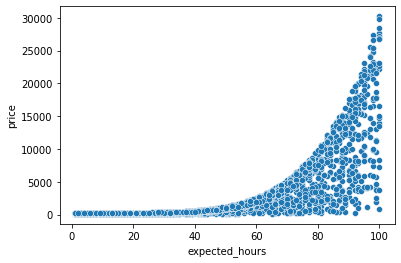

In [ ]:
import seaborn as sns

sns.scatterplot(x="expected_hours", y="price", data=dados)

Existem várias maneiras de tentarmos visualizar as duas classes (0 ou 1 para `finished`) no gráfico. Uma delas é por meio de cores. Utilizaremos a mesma estrutura do método `scatterplot`, mas dessa vez passando o parâmetro `hue`, que será baseado na coluna `finished`, pintando os pontos de acordo com a classe atribuída à essa coluna:

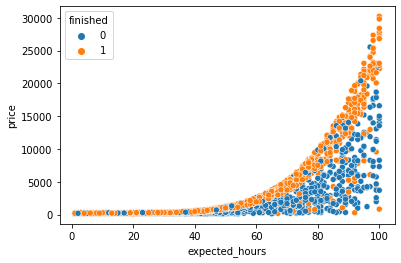

In [ ]:
sns.scatterplot(x="expected_hours", y="price", hue="finished", data=dados)

Tivemos um gráfico com a mesma estrutura, mas com diferentes tonalidades: laranja para projetos finalizados e azul para projetos não finalizados.

A medida em que `expected_hours` aumenta, os agrupamentos de projetos finalizados se deslocam para faixas maiores de `price`.

Uma outra alternativa é realizar uma plotagem relativa por meio de `relplot()`. Com esse método, ao invés das cores, queremos plotar os dados em colunas (col) diferentes, uma para os projetos finalizados e outra para os não-finalizados:

Analisando o gráfico resultante, podemos perceber que parece existir uma faixa mínima de preço para os projetos finalizados, onde estão mais agrupados a subir:

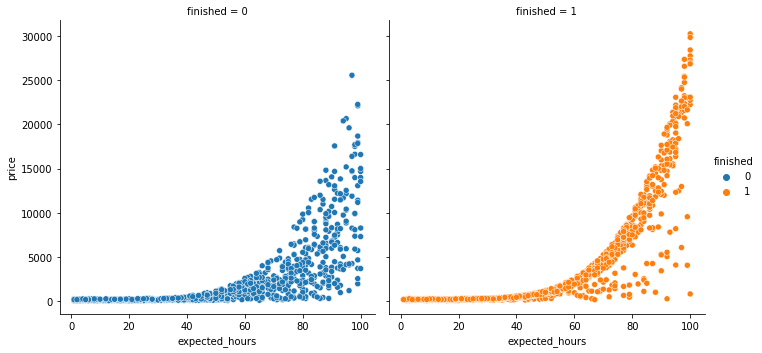

In [ ]:
sns.relplot(x="expected_hours", y="price", hue="finished", col="finished", data=dados)

Nosso próximo passo foi realizar a modelagem. Primeiro, coletamos nossos dados no eixo x, que são as colunas `expected_hours` e `price`. Em seguida, o eixo y, referente a coluna `finished`.

In [ ]:
x = dados[['expected_hours', 'price']]
y = dados['finished']

Agora criaremos um modelo, separaremos os dados de treino e teste, treinaremos efetivamente o modelo e por fim verificaremos a taxa de acerto.

Para realizar a separação de treino e testes usamos `train_test_split` do `Sklearn`. Para a base de testes pegamos 0.25 (25%) para uso.

O primeiro estimador testado será o `LinearSVC`, a classe LinearSVC implementa um algoritmo de classificação, o SVM, ou máquina de vetores de suporte. O que esse algoritmo faz é encontrar uma linha que separe diferentes classes.

O parâmetro `random_state` diz qual a semente (`seed`) que o algoritmo deve usar para embaralhar os dados. Colocando como 0, os dados não são embaralhados, ou seja, sempre teremos o mesmo resultado nas execuções. Nesse caso escolhemos 20, número aleatório.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 48.15%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


A acurácia não parece ser boa, mas essa é a base de um algoritmo para tentar prever resultados. Mas devemos nos perguntar: como saber se ˜48% é de fato ruim?

Para obtermos uma resposta satisfatória, precisamos de um recurso comparativo. Portanto, inventaremos um algoritmo bem simples que terá como previsão que todos os projetos são finalizados (`finished`), isto é, os 540 elementos de teste serão 1.

Com o Numpy, a biblioteca que gera matrizes, faremos com que 540 elementos tenham o valor 1. Feito isso, estipularemos que essas são as previsões, as chamaremos de `previsoes_de_base`, e testaremos sua acurácia.

In [ ]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


Ou seja, com esse algoritmo simples, tivemos um resultado de 52.59% - um valor MAIOR ao do algoritmo anterior, isto é uma resposta contundente que nosso modelo foi ruim.

A baseline é um parâmetro que devemos superar quando construímos estimadores. Devemos ser muito melhores que as porcentagens apresentadas na baseline. 

Precisamos de algum modelo estimador que seja capaz de aprender um padrão mais inteligente. O algoritmo que estamos utilizando só é [capaz de aprender uma linha reta,](https://pt.wikipedia.org/wiki/M%C3%A1quina_de_vetores_de_suporte) que não serve para a atual classificação.

No módulo `sklearn.smv`, temos diversas variações de algoritmos baseados em uma única ideia: Suport Vector Machines, isto é, SVM. Estávamos utilizando anteriormente o LinearSVC, ou Suport Vector Classification, que é baseado em relacionamentos lineares.

Queremos utilizar um algoritmo mais independente e que encontre relacionamentos diferentes, portanto tentaremos o SVC.

In [ ]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


A acurácia aumentou, mas claramente ainda não estamos tendo um palpite muito inteligente.

Uma change pode ser que isso o ocorre devido a discrepância entre os eixos: em X, teremos valores de 0 a 100, e em Y de 0 a 30000. Esses algoritmos são muito suscetíveis a escala, e darão menos valor para variações menores, como é o caso de X.

Escalas distintas em features causam um desbalanço no algoritmo. Uma alternativa para solucionarmos esse problema é reescalarmos todo o nosso projeto para uma faixa similar. Faremos isso utilizando o escalador padrão do `Sklearn`, o `StandardScaler`, que é uma fase de pré-processamento e padronização de valores, essencial para classificações.

Queremos elaborar uma nova escala a partir dos valores de X para treino. Para tanto, criaremos um `StandardScaler()`, que será atribuído à uma variável `scaler`, e treinaremos esse processo baseado em `treino_x`. Em seguida, transformaremos `treino_x` em um novo `treino_x` que já está na nova escala. Em seguida, repetiremos o processo para `teste_x`.

Desse modo, todas as features serão utilizadas para treinar o processo de escala, e por fim, atualizadas de acordo com as novas medidas. Renomearemos os dados "crus" (os originais) adicionando o termo raw - ou seja, raw_treino_x e raw_teste_x.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


Tivemos uma taxa de acerto ainda melhor! Mas ainda precisamos visualizar isso em um gráfico:

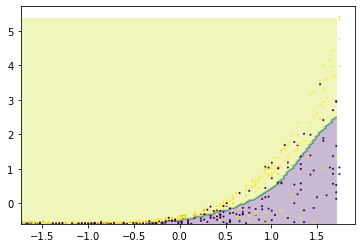

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

# Entre x_min e x_max | y_min e y_max, cada espaço terá o tamanho máximo do gráfico dividido pelo total de pixels ((x_max - x_min)/pixels.

Por fim, adicionaremos o método arange() da biblioteca do Numpy
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

# Agora a ideia é criarmos um grid entre os dois eixos, 
# multiplicando as opções de acordo com as diferentes possibilidade de custo de projeto e tempo de execução. 
# Temos na biblioteca do Numpy o np.meshgrid(), que consegue mesclar um grid. 
# Esse método recebe como parâmetros o eixo_x e eixo_y, e devolve o conteúdo é xx e yy

xx, yy = np.meshgrid(eixo_x, eixo_y)

# O que temos é a repetição do eixo x 100 vezes, e o mesmo ocorre com eixo y. 
# Ou seja, ainda não mesclamos realmente esses dados. Para fazermos isso, usaremos o xx.ravel()
pontos = np.c_[xx.ravel(), yy.ravel()]

# Agora, nosso trabalho é, a partir do modelo, fazer as previsões (predict() para todos esses pontos. 
# Como resultado, teremos uma série de números, que são as classificações. Chamaremos essas classificações de Z.
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

# Para reduzirmos o tamanho dos pontos e melhorarmos a visualização dos dados, usaremos o parâmetro s=1 (de size):
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

Por mais que `LinearSVC` tenha tido uma taxa razoável bem próxima, a linha de decisão na plotagem seria sempre reta, em linha. Na prática, utilizar o SVC parece ser uma decisão melhor: temos uma curva de decisão bem marcada e o estimador possui uma taxa de acerto um pouco maior, de 66.85%.

Concluímos que existem diversos estimadores, os dois que utilizamos até agora são baseados em um algoritmo chamado Suport Vector Machine. Um deles possui uma restrição e consegue apenas estabelecer relacionamentos lineares, e o outro é capaz de elaborar curvas e atinge uma taxa de acurácia mais interessante no caso do nosso projeto.